In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv('./heart.csv')

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# EDA

In [4]:
df.shape

(918, 12)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [6]:
# We see here no missing values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


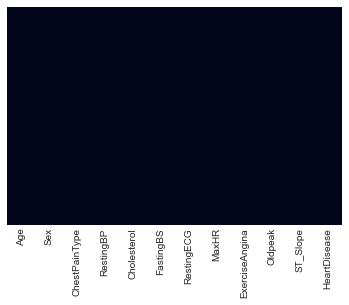

In [7]:
# Graphical representation of missing values
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

In [8]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [9]:
## Below we will assess value_counts() for object features
#print(df[["FastingBS", "HeartDisease"]].groupby("FastingBS").mean().sort_values(by="HeartDisease", ascending=False))
print('\033[1m' 'Value Counts' '\033[0m')
print(u'\u2500' * 70)
print(df.HeartDisease.value_counts())
print(u'\u2500' * 70)
print('Almost 50% of records in the dataset have heart disease.\n In other words, this is a balanced data set!')
print(u'\u2500' * 70)
print(df.Sex.value_counts())
print(u'\u2500' * 70)
print(df.ChestPainType.value_counts())
print(u'\u2500' * 70)
print(df.RestingECG.value_counts())
print(u'\u2500' * 70)
print(df.ExerciseAngina.value_counts())
print(u'\u2500' * 70)
print(df.ST_Slope.value_counts())

Value Counts
──────────────────────────────────────────────────────────────────────
1    508
0    410
Name: HeartDisease, dtype: int64
──────────────────────────────────────────────────────────────────────
Almost 50% of records in the dataset have heart disease.
 In other words, this is a balanced data set!
──────────────────────────────────────────────────────────────────────
M    725
F    193
Name: Sex, dtype: int64
──────────────────────────────────────────────────────────────────────
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64
──────────────────────────────────────────────────────────────────────
Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64
──────────────────────────────────────────────────────────────────────
N    547
Y    371
Name: ExerciseAngina, dtype: int64
──────────────────────────────────────────────────────────────────────
Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64


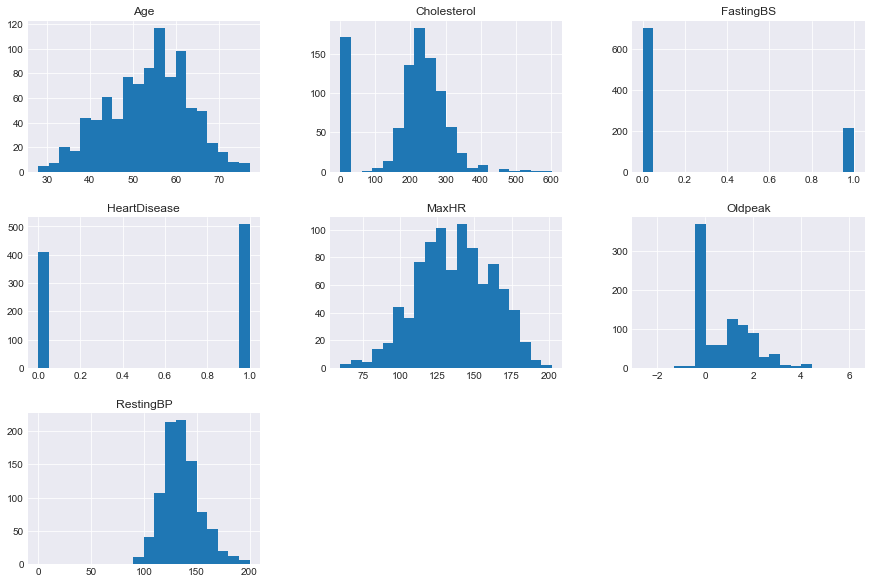

In [10]:
# Histograms for numeric features
%matplotlib inline
df.hist(bins=20, figsize=(15,10))
plt.show()

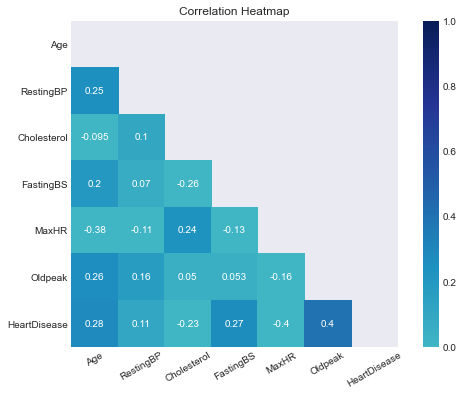

In [11]:
corr = df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(9, 6))

heatmap = sns.heatmap(corr, mask=mask, vmin=0.0, vmax=1.0, center=0,
        square=True, annot=True,cmap="YlGnBu")

plt.title('Correlation Heatmap')
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=30) 
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=360) 
plt.show()

#### To simplify the dataset we will split the data features into two groups: numerical and categorical.

In [12]:
print(df.columns)
num_feature = ['Age', 'RestingBP', 'MaxHR', 'Oldpeak']
cat_feature = ['Sex', 'ChestPainType', 'RestingECG', 'FastingBS', 'ExerciseAngina', 'ST_Slope']
print(num_feature)
print(cat_feature)

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')
['Age', 'RestingBP', 'MaxHR', 'Oldpeak']
['Sex', 'ChestPainType', 'RestingECG', 'FastingBS', 'ExerciseAngina', 'ST_Slope']


['Age', 'RestingBP', 'MaxHR', 'Oldpeak', 'HeartDisease']


<Figure size 1440x720 with 0 Axes>

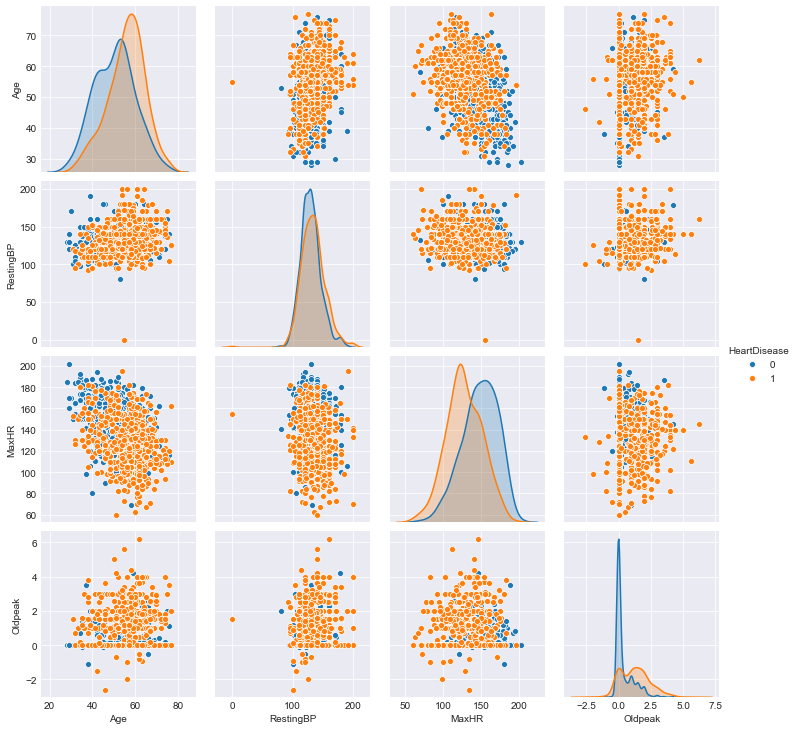

In [13]:
#Observe numerical features with pairplot.
pair = num_feature
pair.append('HeartDisease')
print(pair)
figure = plt.figure(figsize=(20,10))
sns.pairplot(df[pair], hue='HeartDisease')

# Cleaning the data

In [25]:
cat_feature_dict = {'Sex': ['M', 'F'], 'ChestPainType':['TA', 'ATA', 'NAP', 'ASY'],
                    'RestingECG': ['Normal', 'ST', 'LVH'],
                    'ExerciseAngina':['Y', 'N'], 'ST_Slope':['Up', 'Flat', 'Down'] }

def clean_data(df: pd.DataFrame):
    
    # Remove the feature Cholesterol
    df.drop('Cholesterol', axis=1, inplace=True)
    
    #making the categorical features into numerical feature
    for key in cat_feature_dict:
        dummies = pd.get_dummies(df[key], drop_first=False, prefix = key)
        df[dummies.columns] = dummies
    
    return df
    df.to_csv(Users/dahliashamir/Desktop/Python_Projects/Heart_kaggle_dataset/df_heart.csv)



In [26]:
datafile = pd.read_csv('./heart.csv')
df_heart = clean_data(datafile)
df_heart.head()

,Age,Sex,ChestPainType,RestingBP,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,M,ATA,140,0,Normal,172,N,0.0,Up,...,0,0,0,1,0,1,0,0,0,1
1,49,F,NAP,160,0,Normal,156,N,1.0,Flat,...,1,0,0,1,0,1,0,0,1,0
2,37,M,ATA,130,0,ST,98,N,0.0,Up,...,0,0,0,0,1,1,0,0,0,1
3,48,F,ASY,138,0,Normal,108,Y,1.5,Flat,...,0,0,0,1,0,0,1,0,1,0
4,54,M,NAP,150,0,Normal,122,N,0.0,Up,...,1,0,0,1,0,1,0,0,0,1


In [75]:
# Getting classy by preparing an object oriented classifier.
class Model:
    def __init__(self, datafile = pd.read_csv('./heart.csv')):
        self.df_heart = clean_data(datafile)
        self.dtree = DecisionTreeClassifier()
        self.rforest = RandomForestClassifier(n_estimators=100,min_samples_leaf=2)
    
    def split(self, test_size):
        X = np.array(self.df_heart[['Age', 'RestingBP', 'FastingBS', 'MaxHR', 'Oldpeak',
       'Sex_F', 'Sex_M', 'ChestPainType_ASY', 'ChestPainType_ATA',
       'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_LVH',
       'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_N',
       'ExerciseAngina_Y', 'ST_Slope_Down', 'ST_Slope_Flat', 'ST_Slope_Up']])
        y = np.array(self.df_heart['HeartDisease'])
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size = test_size, 
                                                                                random_state = 42)
    
    def fit(self):
        self.model = self.rforest.fit(self.X_train, self.y_train)
    
    def predict(self):
        self.y_pred_train = self.rforest.predict(self.X_train) 
        self.y_pred_test = self.rforest.predict(self.X_test) 
        result = self.rforest.fit(self.X_test, self.y_test)
        return result
        

if __name__ == '__main__':
    model_instance = Model()
    model_instance.split(0.2)
    model_instance.fit()
    model_instance.predict()
    print("Confusion matrix and classification report of the TRAIN set:" ,'\n')
    print(confusion_matrix(model_instance.y_train, model_instance.y_pred_train))
    print(classification_report(model_instance.y_train, model_instance.y_pred_train))
    print("Confusion matrix and classification report of the TEST set: ",'\n')
    print(confusion_matrix(model_instance.y_test, model_instance.y_pred_test))
    print(classification_report(model_instance.y_test, model_instance.y_pred_test))
    

Confusion matrix and classification report of the TRAIN set: 

[[306  27]
 [ 13 388]]
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       333
           1       0.93      0.97      0.95       401

    accuracy                           0.95       734
   macro avg       0.95      0.94      0.94       734
weighted avg       0.95      0.95      0.95       734

Confusion matrix and classification report of the TEST set:  

[[66 11]
 [14 93]]
              precision    recall  f1-score   support

           0       0.82      0.86      0.84        77
           1       0.89      0.87      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184

